In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from utils import classification_evaluation, user_input, pipe_model, patient_diagnostic_for_cardiovascular_disease

In [2]:
dataframe =  pd.read_csv('../data/cleaned_dataset_2.csv')

In [3]:
dataframe.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,gender_women
0,1,20228,140,90,3,1,0,0,1,1,55,34.927679,1
1,2,18857,130,70,3,1,0,0,0,1,52,23.507805,1
2,4,17474,100,60,1,1,0,0,0,0,48,23.011177,1
3,9,22113,130,80,3,1,0,0,1,0,61,37.729725,1
4,12,22584,130,90,3,3,0,0,1,1,62,29.983588,0


In [4]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [5]:
X_train.shape  , X_test.shape, y_train.shape, y_test.shape

((31712, 12), (13592, 12), (31712,), (13592,))

In [6]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Split the data into training and validation sets
X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape

((25369, 12), (6343, 12), (25369,), (6343,))

### Implementing the standard scaler on dataset 1

In [7]:
scaler = StandardScaler()

pipeline_knn = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])
parameter_grid_knn = {"knn__n_neighbors": list(range(1, 20))}

classifier_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=parameter_grid_knn,
    scoring="accuracy",
    cv=5,
)


In [8]:
classifier_knn.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      3252
           1       0.73      0.69      0.71      3091

    accuracy                           0.72      6343
   macro avg       0.73      0.72      0.72      6343
weighted avg       0.73      0.72      0.72      6343



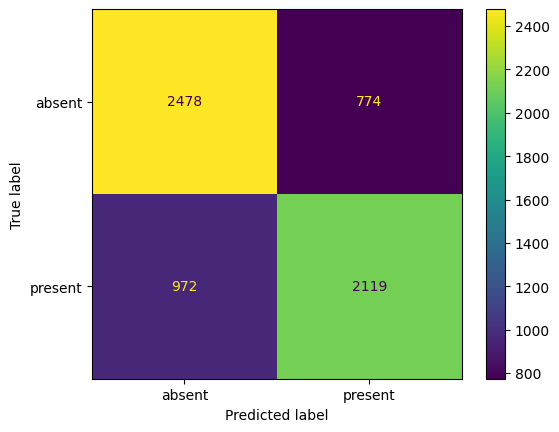

In [9]:
classification_evaluation(model=classifier_knn, x_test=X_val, y_test=y_val)

In [10]:
classifier_knn.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [11]:
#Training entire X_train dataset

classifier_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [12]:
# Predict on X test
y_predictions = classifier_knn.predict(X_test)

In [13]:
print(y_predictions[:10], y_test[:10].to_list())

[1 1 1 1 1 1 0 1 1 0] [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


### Using the normalisation scaler on the dataset 1

In [14]:
scaler_min = MinMaxScaler()

pipeline_knn = Pipeline([("scaler", scaler_min), ("knn", KNeighborsClassifier())])
parameter_grid_knn = {"knn__n_neighbors": list(range(1, 20))}

classifier_knn_min = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=parameter_grid_knn,
    scoring="accuracy",
    cv=5,
)

In [15]:
classifier_knn_min.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.71      0.76      0.74      3252
           1       0.73      0.68      0.70      3091

    accuracy                           0.72      6343
   macro avg       0.72      0.72      0.72      6343
weighted avg       0.72      0.72      0.72      6343



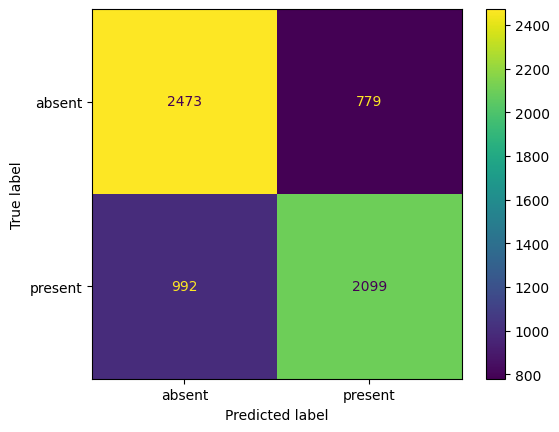

In [16]:
classification_evaluation(model=classifier_knn_min, x_test=X_val, y_test=y_val)

In [17]:
classifier_knn_min.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
classifier_knn_min.best_estimator_.get_params()


In [18]:
y_predictions_min = classifier_knn_min.predict(X_test)

In [19]:
print(y_predictions_min[:10], y_test[:10].to_list())

[1 1 1 1 1 1 0 1 1 0] [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


---

## Dataframe 2

### Standard scaler on dataset 2

In [20]:
dataframe_2 = pd.read_csv('../data/cleaned_dataset_1.csv')
X2, y2 = dataframe.drop("cardio", axis=1), dataframe["cardio"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
X2_train_for_val, X2_val, y2_train_for_val, y2_val = train_test_split(X2_train, y2_train, test_size=0.2)

X2_train_for_val.shape, X2_val.shape, y2_train_for_val.shape, y2_val.shape

((25369, 12), (6343, 12), (25369,), (6343,))

In [21]:
classifier_knn.fit(X2_train_for_val, y2_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.69      0.77      0.72      3152
           1       0.74      0.65      0.69      3191

    accuracy                           0.71      6343
   macro avg       0.71      0.71      0.71      6343
weighted avg       0.71      0.71      0.71      6343



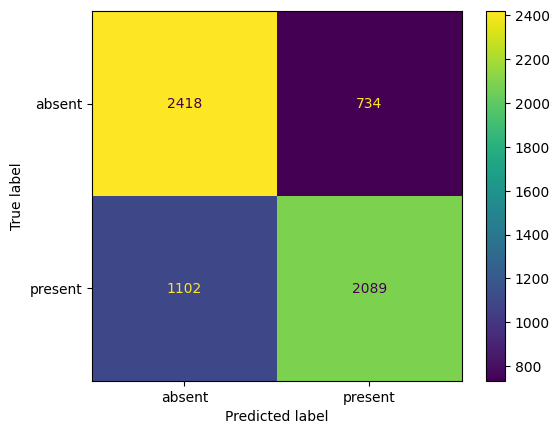

In [22]:
classification_evaluation(model=classifier_knn, x_test=X2_val, y_test=y2_val)

In [23]:
classifier_knn.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [24]:
y_predictions = classifier_knn.predict(X2_test)

In [25]:
print(y_predictions[:10], y2_test[:10].to_list())

[0 0 1 0 0 1 1 0 0 1] [1, 0, 1, 0, 1, 1, 0, 1, 0, 0]


## Normalisation 

In [26]:
classifier_knn_min.fit(X2_train_for_val, y2_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      3152
           1       0.73      0.64      0.69      3191

    accuracy                           0.70      6343
   macro avg       0.71      0.70      0.70      6343
weighted avg       0.71      0.70      0.70      6343



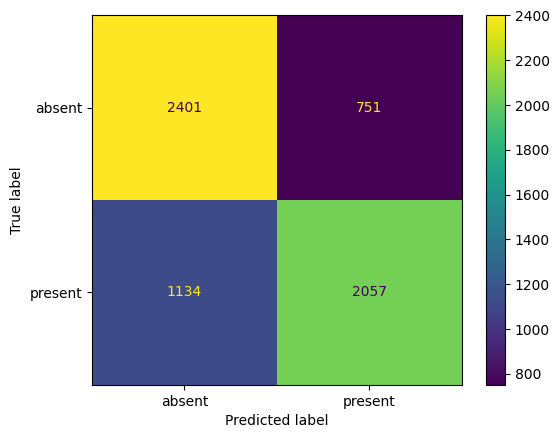

In [27]:
classification_evaluation(model=classifier_knn_min, x_test=X2_val, y_test=y2_val)

In [28]:
classifier_knn_min.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [29]:
y_predictions_min = classifier_knn_min.predict(X2_test)

In [30]:
y_predictions_min = classifier_knn_min.predict(X2_test)

In [31]:
print(y_predictions_min[:10], y_test[:10].to_list())

[1 0 1 1 0 1 1 0 0 1] [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
